In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk("C:\\Users\\asus\\Desktop\\dataset 2"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\asus\Desktop\dataset 2\Test\N\10273274_17efa791a7_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\104149739_3b630e9022_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\106506270_a31e9670cb_b.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\110463720_635c79f61d_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\115317340_7327ed5b5b_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\115317785_59e4de95ee_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\117284712_7f118deb14_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\1189384330_63716e078c_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\1198453933_992eff799e_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\1198480973_0895b34876_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\1199289130_bdda5d2755_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\121296212_81b20a709f_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\12688215_3c720de9f0_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\12945066_536f933ac1_o.jpg
C:\Users\asus\Desktop\dataset 2\Test\N\1321716566_3ea068c1a2_o.jpg
C:\Users

In [2]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from glob import glob
import random

#CNN
from keras.models import Sequential
from keras.layers import Convolution2D, Flatten, Dense, Input, MaxPooling2D, Dropout
#Metrics
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
paths=["C:\\Users\\asus\\Desktop\\dataset 2\\Train","C:\\Users\\asus\\Desktop\\dataset 2\\Test"]

In [4]:
labels=[]
for folder in os.listdir(paths[0]):
    labels.append(folder)

dicc_labels = {i:label for i, label in enumerate(os.listdir(paths[0]))}
dicc_labels

{0: 'N', 1: 'Y'}

In [5]:
n=[]
s=80
_images=[]
_labels=[]
for j in range(0,2):
  for i,folder in enumerate(labels):
      try:
          for image in os.listdir(paths[j] +'/'+folder):
              img = os.path.join(paths[j]+'/'+folder+'/'+image)
              img = cv2.imread(img)
              img = cv2.resize(img,(s,s))
              img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
              #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #if you want to use scale gray
              _images.append(img)
              _labels.append(i)
      except:
          print("error")
  n.append(len(_images))
_images = np.asarray(_images)
_labels = np.asarray(_labels).astype('int64')
print("Images-> ",_images.shape)
print("Amount of data per label-> ",np.bincount(_labels))

Images->  (3105, 80, 80, 3)
Amount of data per label->  [2545  560]


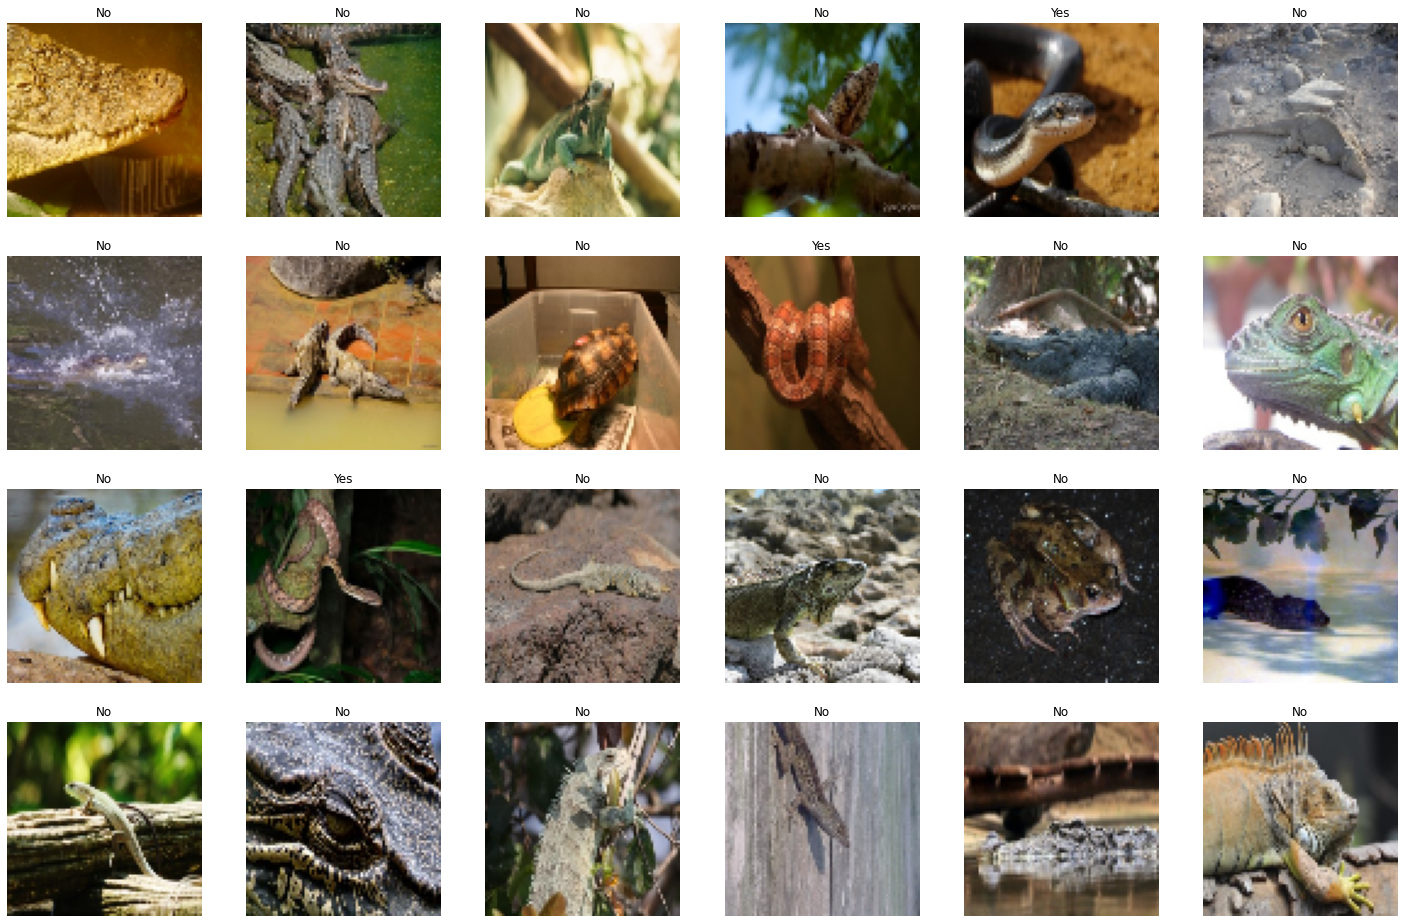

In [7]:
plt.figure(figsize=(25,25))
for i in range(0,24):
    pos= random.randint(0,int(3105))
    plt.subplot(6,6,i+1)
    plt.imshow(_images[pos])    
    plt.axis('off')
    plt.title('No' if _labels[pos]==0 else 'Yes')

In [8]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
_images =_images.reshape((len(_images),-1))
scal.fit(_images) 
_images_scal = scal.transform(_images)

In [9]:
n

[2935, 3105]

In [10]:
X_train=_images_scal[0:n[0]]  #[0:22564]
y_train=_labels[0:n[0]] #[0:22564]

X_test=_images_scal[n[0]:n[1]] #[22564:25077]
y_test=_labels[n[0]:n[1]]       #[22564:25077]


X_train =X_train.reshape(len(X_train),s,s,3) # s->size. 80
X_test = X_test.reshape(len(X_test),s,s,3)

print("imagenes train-> ",X_train.shape,"labels train-> ",y_train.shape)
print("labels train por categoría-> ",np.bincount(y_train))
print("imagenes test-> ",X_test.shape,"labels train-> ",y_test.shape)
print("label test por categoría-> ",np.bincount(y_test))

imagenes train->  (2935, 80, 80, 3) labels train->  (2935,)
labels train por categoría->  [2435  500]
imagenes test->  (170, 80, 80, 3) labels train->  (170,)
label test por categoría->  [110  60]


In [11]:
modelo = Sequential()
modelo.add(Input(shape=(s,s,3)))
modelo.add(Convolution2D(s, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.5))
modelo.add(Convolution2D(s*2, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.5))
modelo.add(Convolution2D(s/2, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.5))
modelo.add(Flatten())
modelo.add(Dense(1, activation="sigmoid"))

modelo.compile(optimizer="adam", loss="binary_crossentropy",
               metrics=["accuracy","Precision"]
)
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 80)        2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 80)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 39, 39, 80)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 160)       115360    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 160)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 160)       0

Epoch 1/10
92/92 [==============================] - 32s 330ms/step - loss: 0.4908 - accuracy: 0.8249 - precision: 0.2083
Epoch 2/10
92/92 [==============================] - 31s 332ms/step - loss: 0.4646 - accuracy: 0.8296 - precision: 0.0000e+00
Epoch 3/10
92/92 [==============================] - 30s 327ms/step - loss: 0.4524 - accuracy: 0.8286 - precision: 0.2857
Epoch 4/10
92/92 [==============================] - 30s 324ms/step - loss: 0.4520 - accuracy: 0.8296 - precision: 0.5000
Epoch 5/10
92/92 [==============================] - 31s 332ms/step - loss: 0.4433 - accuracy: 0.8317 - precision: 0.5789
Epoch 6/10
92/92 [==============================] - 36s 392ms/step - loss: 0.4312 - accuracy: 0.8310 - precision: 0.5435
Epoch 7/10
92/92 [==============================] - 36s 390ms/step - loss: 0.4240 - accuracy: 0.8337 - precision: 0.6500
Epoch 8/10
92/92 [==============================] - 36s 389ms/step - loss: 0.4293 - accuracy: 0.8327 - precision: 0.5849
Epoch 9/10
92/92 [==========

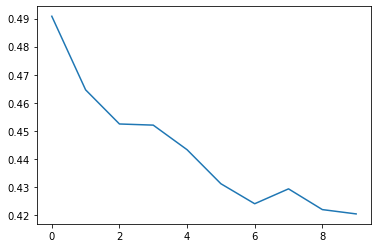

In [12]:
historial=modelo.fit(X_train, y_train, validation_batch_size=(X_test,y_test),epochs=10)
plt.plot(historial.history["loss"])
pred = modelo.predict(X_test)

pred_labels = (pred >= 0.5).astype(int)

In [13]:
pred = modelo.predict(X_test)
pred=np.where(pred >= 0.5, 1, 0)
print(classification_report(
    y_test,
    pred
))

6/6 [==============================] - 0s 62ms/step
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       110
           1       0.00      0.00      0.00        60

    accuracy                           0.65       170
   macro avg       0.32      0.50      0.39       170
weighted avg       0.42      0.65      0.51       170



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
cm=confusion_matrix(y_test,pred)
cm

array([[110,   0],
       [ 60,   0]], dtype=int64)

IndexError: index 3105 is out of bounds for axis 0 with size 3105

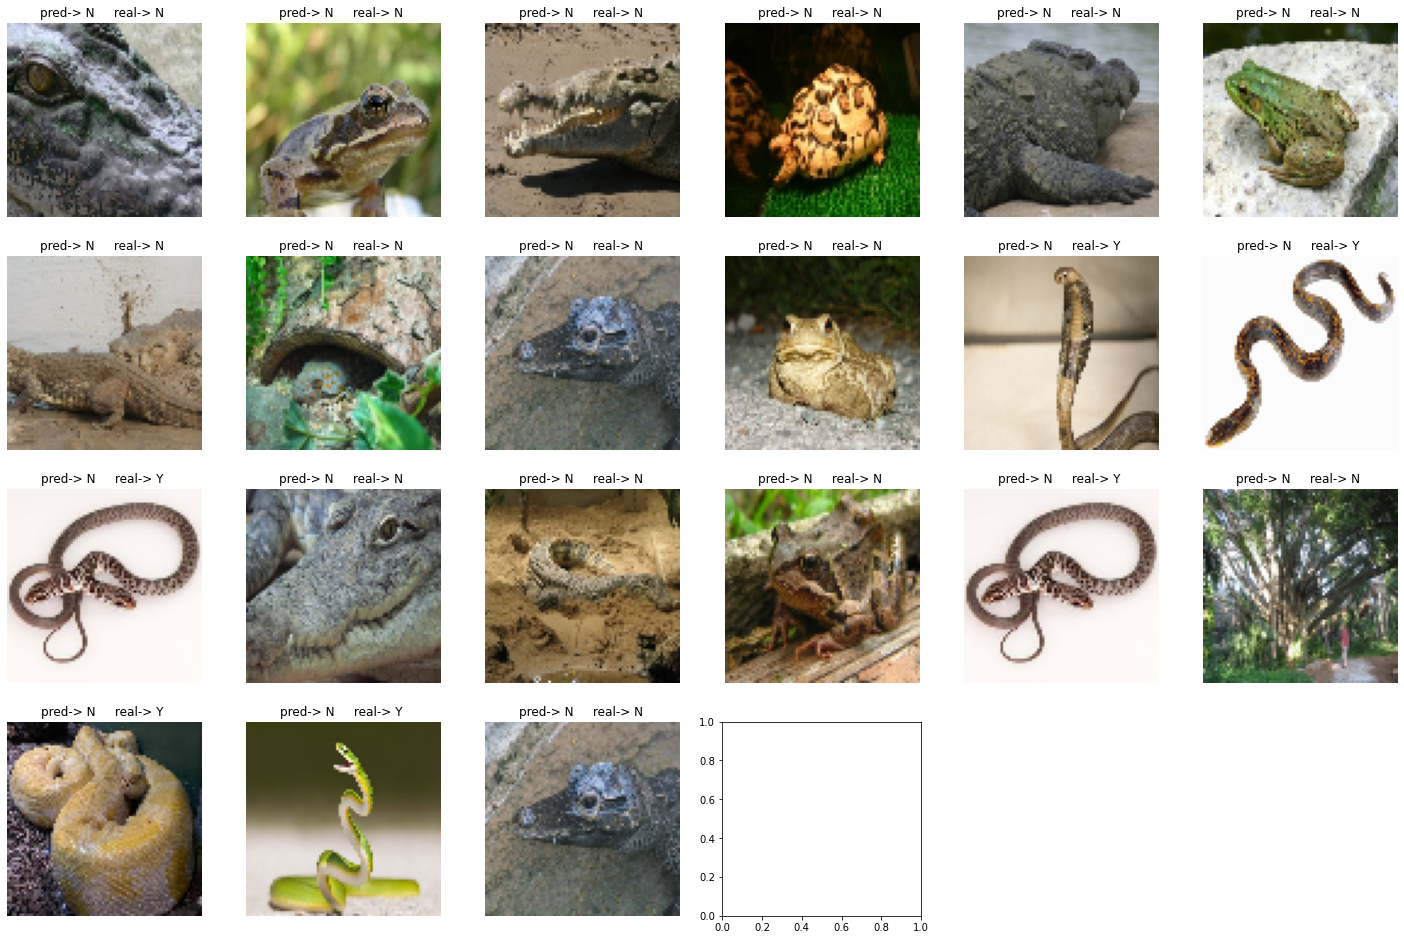

In [15]:
_images =_images.reshape(len(_images),s,s,3)
plt.figure(figsize=(25,25))
for i in range(0,24):
    pos= random.randint(0,int(n[1]-n[0]))
    plt.subplot(6,6,i+1)
    plt.imshow(_images[n[0]+pos])    
    plt.axis('off')
    plt.title("pred-> %s     real-> %s "%(dicc_labels[pred[pos][0]],dicc_labels[y_test[pos]]))

In [16]:
modelo.save('model_reptile.h5')